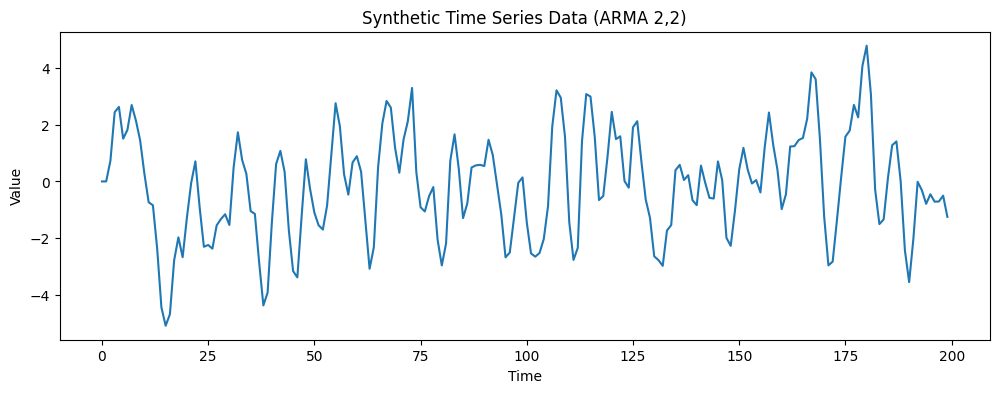

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -268.233
Date:                Mon, 15 Dec 2025   AIC                            548.467
Time:                        16:40:16   BIC                            568.257
Sample:                             0   HQIC                           556.476
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1613      0.215     -0.749      0.454      -0.584       0.261
ar.L1          0.8459      0.179      4.737      0.000       0.496       1.196
ar.L2         -0.3831      0.133     -2.886      0.0

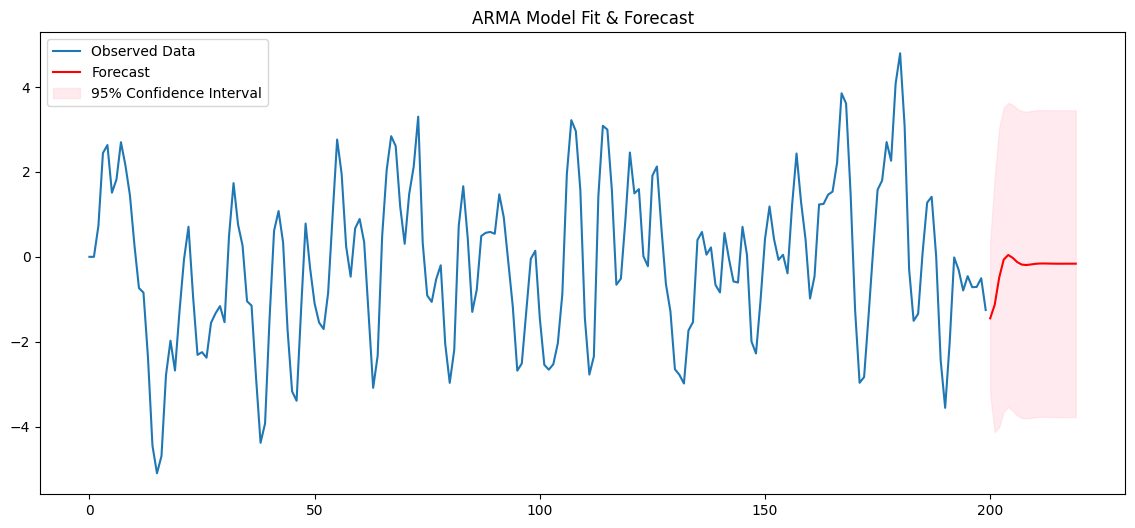

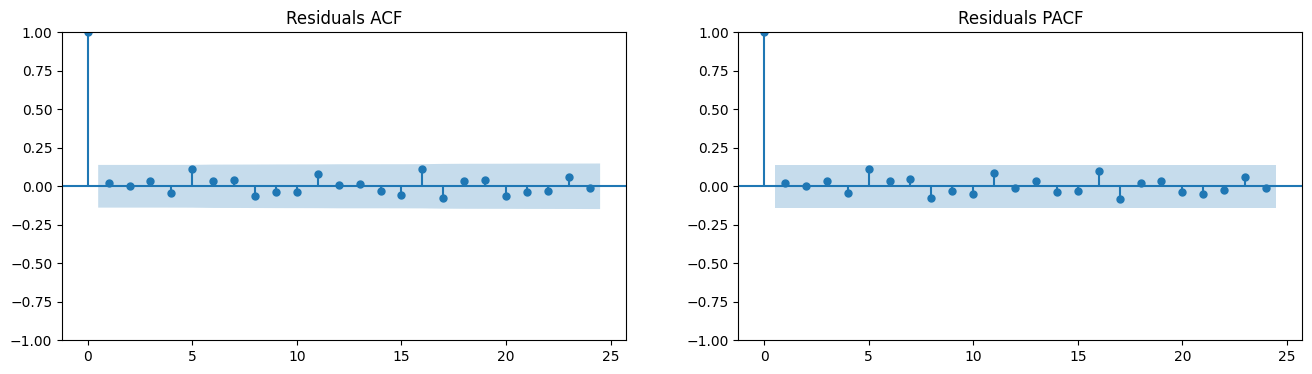

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Data Simulation
# I'm generating synthetic data here to demonstrate the model.
# In a real scenario, I would load a CSV using pd.read_csv().
np.random.seed(42)

# I am simulating an ARMA(2, 2) process
ar_params = np.array([0.75, -0.25])
ma_params = np.array([0.65, 0.35])
n_samples = 200

# Generating the noise (residuals)
errors = np.random.normal(0, 1, n_samples)
data = np.zeros(n_samples)

# Manually constructing the time series based on the ARMA formula
for t in range(2, n_samples):
    # AR term: weighted sum of past values
    ar_term = ar_params[0] * data[t-1] + ar_params[1] * data[t-2]
    # MA term: weighted sum of past errors
    ma_term = ma_params[0] * errors[t-1] + ma_params[1] * errors[t-2]
    data[t] = ar_term + ma_term + errors[t]

# Converting to a pandas Series for easier handling with statsmodels
ts_data = pd.Series(data)

# 2. Visualization of Raw Data
# Before fitting, I always like to visualize the raw time series and autocorrelation.
plt.figure(figsize=(12, 4))
plt.plot(ts_data)
plt.title("Synthetic Time Series Data (ARMA 2,2)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# 3. Model Fitting
# I am using the ARIMA class from statsmodels.
# Note: An ARMA(p,q) model is simply an ARIMA(p,0,q) model (differencing d=0).
# I've chosen order=(2, 0, 2) to match the synthetic data generation.
model = ARIMA(ts_data, order=(2, 0, 2))
model_fit = model.fit()

# I print the summary to evaluate coefficients and p-values
print(model_fit.summary())

# 4. Forecasting
# I'm forecasting the next 20 steps to see how the model generalizes.
forecast_steps = 20
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = np.arange(n_samples, n_samples + forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# 5. Visualization of Results
plt.figure(figsize=(14, 6))

# Plotting historical data
plt.plot(ts_data.index, ts_data, label='Observed Data')

# Plotting the forecast
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')

# Adding a confidence interval (shading) to show uncertainty
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title("ARMA Model Fit & Forecast")
plt.legend()
plt.show()

# 6. Residual Analysis
# I check the residuals to ensure there are no patterns left (white noise).
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, ax=ax[1])
ax[0].set_title("Residuals ACF")
ax[1].set_title("Residuals PACF")
plt.show()